<a href="https://colab.research.google.com/github/arunmozhidevan/MDS271-Machine-Learning/blob/main/LAB_1_Getting_Familiar_with_Machine_Learning_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1 - Getting Familiar with Machine Learning Libraries

## 1. Download the 80-cereals dataset from https://www.kaggle.com/crawford/80-cereals

In [53]:
!pip install opendatasets

In [54]:
import opendatasets as od

In [55]:
od.download("https://www.kaggle.com/crawford/80-cereals")

Skipping, found downloaded files in "./80-cereals" (use force=True to force download)


## 2. Load the dataset using pd.read_csv method

In [56]:
import pandas as pd

In [57]:
data = pd.read_csv('/content/80-cereals/cereal.csv')

In [58]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [59]:
data.iloc[:,3:-1]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


## 3. 
* a. In the column "mfr", replace the column "K" as "Kellogg's", "G" as "Nestle" and all other values as "Other Brands"
* b. In the column "type", replace "C" with "Type 1" and "H" with "Type 2"

In [60]:
data['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [61]:
data['mfr'] = data['mfr'].map({'N':"Other Brands", 'Q':"Other Brands", 'K':"Kellogg's", 'R':"Other Brands", 'G':"Nestle", 'P':"Other Brands", 'A':"Other Brands"})

In [62]:
data['type'].unique()

array(['C', 'H'], dtype=object)

In [63]:
data['type'] = data['type'].map({'C':"Type 1", 'H':"Type 2"})

In [64]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Other Brands,Type 1,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Other Brands,Type 1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kellogg's,Type 1,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kellogg's,Type 1,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Other Brands,Type 1,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,Nestle,Type 1,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,Nestle,Type 1,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,Other Brands,Type 1,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,Nestle,Type 1,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


## 4. Visualise the count of above two features "mfr" and "type" with a bar-plot

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

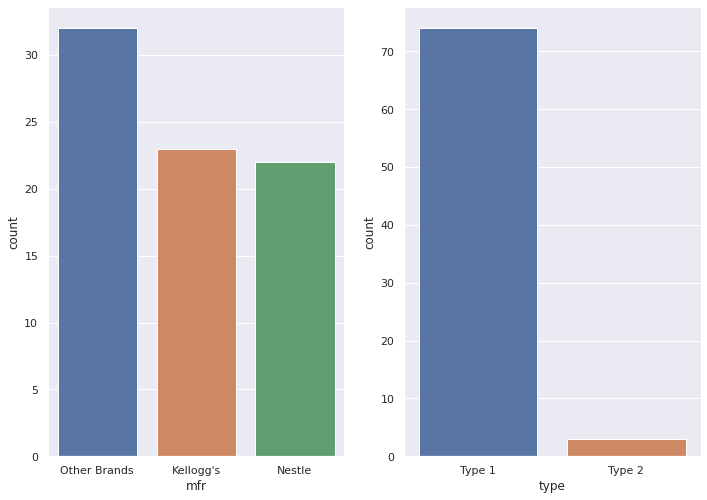

In [66]:
f, ax = plt.subplots(1,2)
sns.countplot(x='mfr',data=data, orient='v', ax=ax[0])
sns.countplot(x='type',data=data, orient='v', ax=ax[1])

## 5. Describe the five-number summary and boxplots of the features - protien, sugars, fat, carbo

In [67]:
data.describe()[['protein', 'sugars', 'fat', 'carbo']]

,protein,sugars,fat,carbo
count,77.000000,77.000000,77.000000,77.000000
mean,2.545455,6.922078,1.012987,14.597403
std,1.094790,4.444885,1.006473,4.278956
min,1.000000,-1.000000,0.000000,-1.000000
25%,2.000000,3.000000,0.000000,12.000000
50%,3.000000,7.000000,1.000000,14.000000
75%,3.000000,11.000000,2.000000,17.000000
max,6.000000,15.000000,5.000000,23.000000


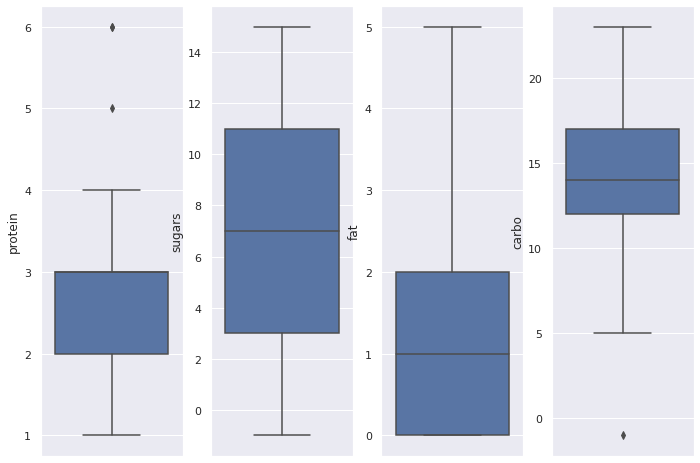

In [68]:
f, ax = plt.subplots(1,4)
sns.boxplot(y='protein', data=data, ax=ax[0])
sns.boxplot(y='sugars', data=data, ax=ax[1])
sns.boxplot(y='fat', data=data, ax=ax[2])
sns.boxplot(y='carbo', data=data, ax=ax[3])

## 6. Plot Histograms for the features - fat, carbo, sodium, fiber

Text(0.5, 1.0, 'carbo')

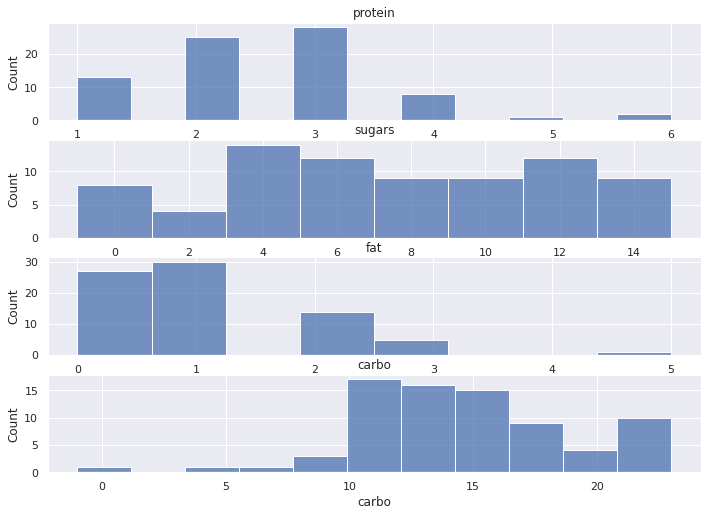

In [69]:
f, ax = plt.subplots(4,1)
sns.histplot(x='protein', data=data, ax=ax[0])
ax[0].set_title("protein")
sns.histplot(x='sugars', data=data, ax=ax[1])
ax[1].set_title("sugars")
sns.histplot(x='fat', data=data, ax=ax[2])
ax[2].set_title("fat")
sns.histplot(x='carbo', data=data, ax=ax[3])
ax[3].set_title("carbo")

## 7. Split the datasets into following ratios: 60:40, 70:30, 80:20. Write down what happens when you give "random_state" parameter with a constant value and what happens if you do not mention the parameter at all.

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
for i in [.4, .3, .2]:
  print(f'ratio {(1-i)*100}:{i*100}')
  X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=i)
  print(f'train: {len(X_train)/len(data)} test: {len(X_test)/len(data)}\n')

ratio 60.0:40.0
train: 0.5974025974025974 test: 0.4025974025974026

ratio 70.0:30.0
train: 0.6883116883116883 test: 0.3116883116883117

ratio 80.0:20.0
train: 0.7922077922077922 test: 0.2077922077922078



### Write down what happens when you give "random_state" parameter with a constant value and what happens if you do not mention the parameter at all.

when we assign value to "random_state" on the dataset, we get the same randomness if we do train_test_split again and againg. If we didn't specify "random_state" then by default a random seed will be set some random seed values. here im setting up the random state as 4 and calling the train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.4, random_state=4)
X_train[:5]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
27,120,3,2,160,5.0,12.0,10,200,25,3,1.25,0.67
54,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00
25,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75
35,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00
17,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00


In [73]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.4, random_state=4)
X_train[:5]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
27,120,3,2,160,5.0,12.0,10,200,25,3,1.25,0.67
54,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00
25,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75
35,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00
17,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00


in above both values are same because of the random state has been set but if i didnt specify random state ill get different random seeds by default

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.4)
X_train[:5]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
25,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75
37,110,1,0,180,0.0,14.0,11,35,25,1,1.0,1.33
23,100,2,0,190,1.0,18.0,5,80,25,3,1.0,0.75
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
71,100,3,1,200,3.0,16.0,3,110,100,3,1.0,1.00


In [75]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,3:-1],data.iloc[:,-1],test_size=.4)
X_train[:5]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
12,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75
8,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67
73,110,1,1,140,0.0,13.0,12,25,25,2,1.00,1.00
55,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00
58,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75


above both values changes because we did set the random state



## 8. Apply MinMaxScaler() and StandardScaler() to the following features: calories, protien, fat, sodium, fiber, carbo, sugars.

In [76]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [77]:
data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars']]

,calories,protein,fat,sodium,fiber,carbo,sugars
0,70,4,1,130,10.0,5.0,6
1,120,3,5,15,2.0,8.0,8
2,70,4,1,260,9.0,7.0,5
3,50,4,0,140,14.0,8.0,0
4,110,2,2,200,1.0,14.0,8
...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3
73,110,1,1,140,0.0,13.0,12
74,100,3,1,230,3.0,17.0,3
75,100,3,1,200,3.0,17.0,3


In [78]:
# StandardScaler
StandardScaler().fit_transform(data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars']])[:10]

array([[-1.90539669,  1.33731939, -0.01298811, -0.35630563,  3.31443928,
        -2.25763865, -0.20880727],
       [ 0.67762347,  0.41791231,  3.98734926, -1.73708742, -0.06417167,
        -1.55193563,  0.24409864],
       [-1.90539669,  1.33731939, -0.01298811,  1.20457813,  2.89211291,
        -1.78716997, -0.43526023],
       [-2.93860476,  1.33731939, -1.01307245, -0.23623765,  5.00374475,
        -1.55193563, -1.56752502],
       [ 0.16101944, -0.50149477,  0.98709623,  0.48417024, -0.48649804,
        -0.1405296 ,  0.24409864],
       [ 0.16101944, -0.50149477,  0.98709623,  0.24403427, -0.27533485,
        -0.96384979,  0.69700456],
       [ 0.16101944, -0.50149477, -1.01307245, -0.41633962, -0.48649804,
        -0.84623262,  1.60281639],
       [ 1.1942275 ,  0.41791231,  0.98709623,  0.60423822, -0.06417167,
         0.80040775,  0.24409864],
       [-0.87218863, -0.50149477, -0.01298811,  0.48417024,  0.78048107,
         0.09470473, -0.20880727],
       [-0.87218863,  0.4179

In [79]:
# MinMaxScaler
MinMaxScaler().fit_transform(data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars']])[:10]

array([[0.18181818, 0.6       , 0.2       , 0.40625   , 0.71428571,
        0.25      , 0.4375    ],
       [0.63636364, 0.4       , 1.        , 0.046875  , 0.14285714,
        0.375     , 0.5625    ],
       [0.18181818, 0.6       , 0.2       , 0.8125    , 0.64285714,
        0.33333333, 0.375     ],
       [0.        , 0.6       , 0.        , 0.4375    , 1.        ,
        0.375     , 0.0625    ],
       [0.54545455, 0.2       , 0.4       , 0.625     , 0.07142857,
        0.625     , 0.5625    ],
       [0.54545455, 0.2       , 0.4       , 0.5625    , 0.10714286,
        0.47916667, 0.6875    ],
       [0.54545455, 0.2       , 0.        , 0.390625  , 0.07142857,
        0.5       , 0.9375    ],
       [0.72727273, 0.4       , 0.4       , 0.65625   , 0.14285714,
        0.79166667, 0.5625    ],
       [0.36363636, 0.2       , 0.2       , 0.625     , 0.28571429,
        0.66666667, 0.4375    ],
       [0.36363636, 0.4       , 0.        , 0.65625   , 0.35714286,
        0.58333333, 0.3

## 9. Does the standard or min-max scaling make a difference in value distribution? Support your answers with some visualisations on the above dataset.

There is big difference that StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 
MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.

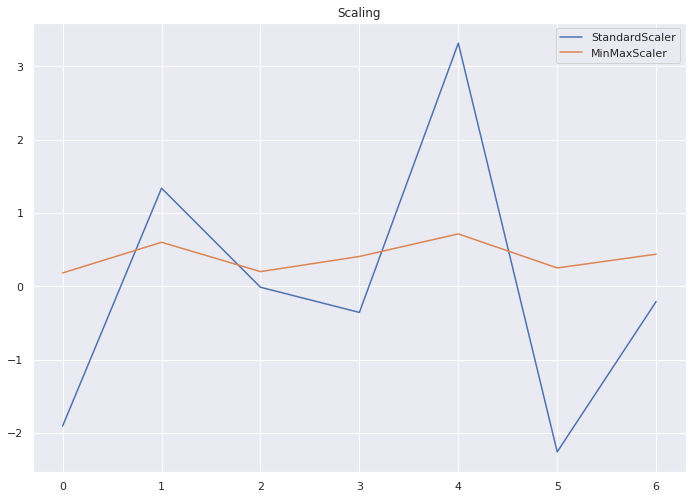

In [80]:
plt.plot(StandardScaler().fit_transform(data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars']])[0], label='StandardScaler')
plt.plot(MinMaxScaler().fit_transform(data[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars']])[0], label='MinMaxScaler')
plt.title('Scaling')
plt.legend()

## 10. As an extension of 7th step, Generate a new Pandas DataFrame with the following columns based on the Training Dataset: Split Ratio | Random State | Total Number of Entries | Count of Kellogg's | Count of Nestle | Count of Other Brands

In [103]:
import random

In [111]:
addList = list()

def setData():
  
  for i in [.4, .3, .2]:
    RandomState  =  random.randint(0,100)
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:-1],data.iloc[:,-1],test_size=i, random_state=RandomState)
    TotalNumberofEntries  =  X_train.shape[0]
    CountofKellogg =  X_train['mfr'].value_counts()[1]
    CountofNestle  =  X_train['mfr'].value_counts()[2]
    CountofOtherBrands = X_train['mfr'].value_counts()[0]
    addList.append([i, RandomState,    TotalNumberofEntries,    CountofKellogg,    CountofNestle,    CountofOtherBrands])
setData()
addList

[[0.4, 68, 46, 13, 12, 21],
 [0.3, 49, 53, 16, 14, 23],
 [0.2, 97, 61, 21, 16, 24]]

In [112]:
pd.DataFrame(addList, columns=['SplitRatio','RandomState','TotalNumberofEntries','CountofKellogg','CountofNestle','CountofOtherBrands'])

,SplitRatio,RandomState,TotalNumberofEntries,CountofKellogg,CountofNestle,CountofOtherBrands
0,0.4,68,46,13,12,21
1,0.3,49,53,16,14,23
2,0.2,97,61,21,16,24
